In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y =mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

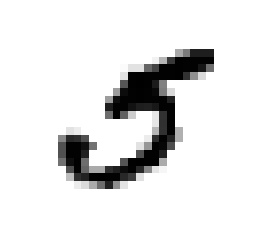

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit =X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off") 
plt.show()


In [8]:
y[36000]

5.0

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([False])

# Performance Measures

In [8]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.94695, 0.955  , 0.96725])

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_5_clf = Never5Classifier()

In [18]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90915, 0.9101 , 0.9097 ])

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 

In [20]:
from sklearn.metrics import confusion_matrix


In [21]:
confusion_matrix(y_train_5, y_train_pred)

array([[53027,  1552],
       [ 1064,  4357]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
precision_score(y_train_5, y_train_pred)

0.7373498053816212

In [24]:
recall_score(y_train_5, y_train_pred)

0.8037262497694152

In [49]:
from sklearn.metrics import f1_score

In [26]:
f1_score(y_train_5, y_train_pred)

0.7691085613415709

In [27]:
y_scores = sgd_clf.decision_function([some_digit])

In [28]:
y_scores

array([-80860.39256788])

In [29]:
threshold=0

In [30]:
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred


array([False])

In [32]:
(y_scores > threshold)

array([False])

In [33]:
y_some_digit_pred == (y_scores > threshold)

array([ True])

In [34]:
threshold = 300000

In [35]:
y_some_digit_pred == (y_scores > threshold)

array([ True])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method="decision_function")

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

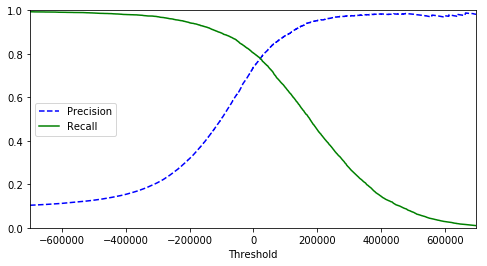

In [44]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") #Plot the variables/using a blue dashed line/label of Y line is Precsion
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") #Plot the variables/using a greem line/label of Y line is Recall
    plt.xlabel("Threshold") # Label of x axis
    plt.legend(loc="center left") # location of legend
    plt.ylim([0,1]) #min and max value of axis


plt.figure(figsize=(8, 4)) # size of plot
plt.xlim([-700000, 700000])  #min and max value of axis
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) #the actual plot - excution of function
plt.show()

In [46]:
(y_train_pred == (y_scores > 0)).all()

True

In [49]:
y_train_pred_90 = (y_scores > 70000)

In [50]:
precision_score(y_train_5, y_train_pred_90)

0.8512025174196448

In [51]:
recall_score(y_train_5, y_train_pred_90)

0.6985795978601734

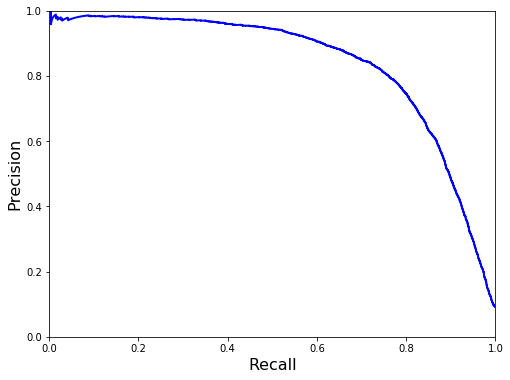

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) #outputs roc curve data 

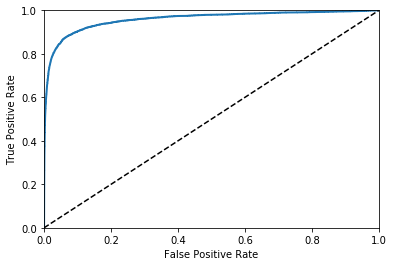

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--') # plot dotted line of equality in black
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_train_5, y_scores)

0.9589325254509151

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method = "predict_proba")

In [60]:
y_scores_forest = y_probas_forest[:, 1] # score= proba of a positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


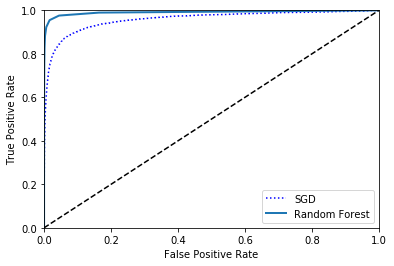

In [63]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [64]:
roc_auc_score(y_train_5, y_scores_forest)

0.9910774786806245

# Multiclass Classification

In [65]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [74]:
sgd_clf.predict([some_digit])

array([3.])

In [69]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [75]:
some_digit_scores

array([[-155525.73717871, -440071.27806761, -302472.39529606,
         -65182.80812521, -491706.82129949,  -80860.39256788,
        -778695.27503395, -289883.72699095, -745648.03118798,
        -660890.59323264]])

In [77]:
from sklearn.multiclass import OneVsOneClassifier

In [80]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [81]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [82]:
ovo_clf.predict([some_digit])

array([5.])

In [83]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
forest_clf.predict([some_digit])

array([5.])

In [86]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. ]])

In [88]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.82083583, 0.85344267, 0.87448117])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [14]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([0.9070186 , 0.90659533, 0.91193679])

In [16]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [35]:

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx = conf_mx.astype(float)

In [36]:
conf_mx

array([[5.718e+03, 2.000e+00, 2.600e+01, 9.000e+00, 1.000e+01, 5.200e+01,
        4.600e+01, 1.000e+01, 4.600e+01, 4.000e+00],
       [1.000e+00, 6.446e+03, 4.800e+01, 2.900e+01, 7.000e+00, 4.300e+01,
        6.000e+00, 1.400e+01, 1.360e+02, 1.200e+01],
       [5.500e+01, 4.000e+01, 5.301e+03, 1.050e+02, 8.000e+01, 3.100e+01,
        9.200e+01, 5.900e+01, 1.790e+02, 1.600e+01],
       [4.200e+01, 4.100e+01, 1.420e+02, 5.309e+03, 3.000e+00, 2.610e+02,
        3.400e+01, 5.100e+01, 1.380e+02, 1.100e+02],
       [1.700e+01, 2.200e+01, 3.700e+01, 9.000e+00, 5.368e+03, 9.000e+00,
        5.600e+01, 3.200e+01, 8.300e+01, 2.090e+02],
       [7.100e+01, 3.700e+01, 3.700e+01, 1.760e+02, 7.900e+01, 4.631e+03,
        1.030e+02, 2.400e+01, 1.580e+02, 1.050e+02],
       [2.800e+01, 2.100e+01, 4.400e+01, 2.000e+00, 4.600e+01, 9.400e+01,
        5.632e+03, 5.000e+00, 4.500e+01, 1.000e+00],
       [2.600e+01, 1.800e+01, 7.200e+01, 3.000e+01, 5.800e+01, 1.200e+01,
        4.000e+00, 5.782e+03, 1.700e+

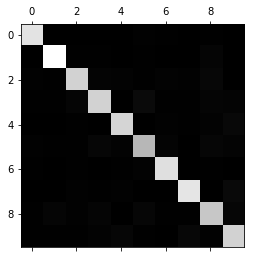

In [37]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

In [38]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx/row_sums


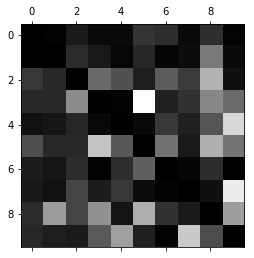

In [39]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [42]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

NameError: name 'save_fig' is not defined

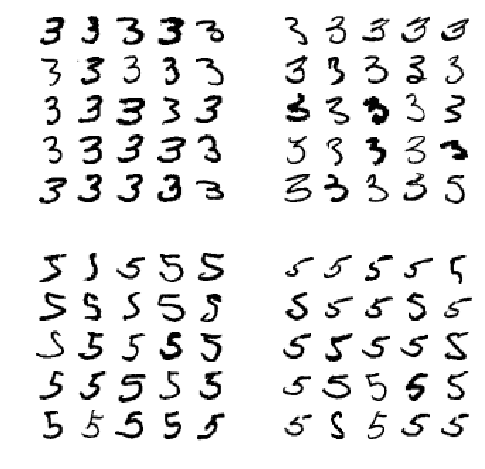

In [43]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [52]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

MemoryError: 

In [ ]:
f1_score(y_multilabel, y_train_knn_p)